In [165]:
# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# classificacao
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [166]:
df = pd.read_csv("db/UCI_Credit_Card.csv", sep=",")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [167]:
df.shape

(30000, 25)

##### ID: ID de cada cliente

##### LIMIT_BAL: Valor do crédito concedido em dólares NT (inclui crédito individual e familiar/complementar)

##### SEXO: Gênero (1=masculino, 2=feminino)

##### EDUCAÇÃO: (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros, 5=desconhecido, 6=desconhecido)

##### CASAMENTO: Estado civil (1=casado, 2=solteiro, 3=outros)

##### IDADE: Idade em anos

##### PAY_0:     Situação do reembolso em setembro de 2005 (-1=pagamento devido, 1=atraso no pagamento por um mês, 2=atraso no pagamento por dois meses,… 8=atraso no pagamento por oito meses, 9=atraso no pagamento por nove meses ou mais)
##### PAY_2:     Situação do reembolso em agosto de 2005 (escala igual à acima)
##### PAY_3:     Status do reembolso em julho de 2005 (escala igual à acima)
##### PAY_4:     Situação do reembolso em junho de 2005 (escala igual à acima)
##### PAY_5:     Situação do reembolso em maio de 2005 (escala igual à acima)
##### PAY_6:     Status de reembolso em abril de 2005 (escala igual à acima)

##### BILL_AMT1: Valor do extrato da conta em setembro de 2005 (dólar NT)
##### BILL_AMT2: Valor do extrato da conta em agosto de 2005 (dólar NT)
##### BILL_AMT3: Valor do extrato da conta em julho de 2005 (dólar NT)
##### BILL_AMT4: Valor do extrato da conta em junho de 2005 (dólar NT)
##### BILL_AMT5: Valor do extrato da conta em maio de 2005 (dólar NT)
##### BILL_AMT6: Valor do extrato da conta em abril de 2005 (dólar NT)

##### PAY_AMT1:  Valor do pagamento anterior em setembro de 2005 (dólar NT)
##### PAY_AMT2:  Valor do pagamento anterior em agosto de 2005 (dólar NT)
##### PAY_AMT3:  Valor do pagamento anterior em julho de 2005 (dólar NT)
##### PAY_AMT4:  Valor do pagamento anterior em junho de 2005 (dólar NT)
##### PAY_AMT5:  Valor do pagamento anterior em maio de 2005 (dólar NT)
##### PAY_AMT6:  Valor do pagamento anterior em abril de 2005 (dólar NT)

##### default.payment.next.month: INADIMPLENTE (1=sim, 0=não)

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [170]:
df = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                             'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0',
                             'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1',
                             'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1',
                             'default.payment.next.month' ]]

In [171]:
df.rename(columns={'SEX':'SEXO', 'EDUCATION':'EDUCACAO','MARRIAGE':'CASADO(A)','AGE':'IDADE'}, inplace=True)
df.rename(columns={'PAY_0':'STT_set', 'PAY_2':'STT_ago','PAY_3':'STT_jul','PAY_4':'STT_jun','PAY_5':'STT_mai','PAY_6':'STT_abr'}, inplace=True)
df.rename(columns={'BILL_AMT1':'EXT_set', 'BILL_AMT2':'EXT_ago','BILL_AMT3':'EXT_jul','BILL_AMT4':'EXT_jun','BILL_AMT5':'EXT_mai','BILL_AMT6':'EXT_abr'}, inplace=True)
df.rename(columns={'PAY_AMT1':'PAG_set', 'PAY_AMT2':'PAG_ago', 'PAY_AMT3':'PAG_jul', 'PAY_AMT4':'PAG_jun', 'PAY_AMT5':'PAG_mai', 'PAY_AMT6':'PAG_abr'}, inplace=True)
df.rename(columns={'default.payment.next.month':'INADIMPLENTE'}, inplace=True)
df.rename(columns={'LIMIT_BAL':'LIM_DISPON'}, inplace=True)
df.head()

,ID,LIM_DISPON,SEXO,EDUCACAO,CASADO(A),IDADE,STT_abr,STT_mai,STT_jun,STT_jul,...,EXT_jul,EXT_ago,EXT_set,PAG_abr,PAG_mai,PAG_jun,PAG_jul,PAG_ago,PAG_set,INADIMPLENTE
0,1,20000.0,2,2,1,24,-2,-2,-1,-1,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,2,120000.0,2,2,2,26,2,0,0,0,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,5,50000.0,1,2,1,57,0,0,0,-1,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [172]:
df.isna().sum()

ID              0
LIM_DISPON      0
SEXO            0
EDUCACAO        0
CASADO(A)       0
IDADE           0
STT_abr         0
STT_mai         0
STT_jun         0
STT_jul         0
STT_ago         0
STT_set         0
EXT_abr         0
EXT_mai         0
EXT_jun         0
EXT_jul         0
EXT_ago         0
EXT_set         0
PAG_abr         0
PAG_mai         0
PAG_jun         0
PAG_jul         0
PAG_ago         0
PAG_set         0
INADIMPLENTE    0
dtype: int64

In [173]:
## sns.pairplot(df)

In [174]:
print(f'{df['EDUCACAO'].value_counts()}')
print(f'{df['SEXO'].value_counts()}')
print(f'{df['CASADO(A)'].value_counts()}')

meses = ['abr', 'mai', 'jun', 'jul', 'ago', 'set']
for value in meses:
    print(f'{df['STT_'+(value)].value_counts()}')

EDUCACAO
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
SEXO
2    18112
1    11888
Name: count, dtype: int64
CASADO(A)
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
STT_abr
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64
STT_mai
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64
STT_jun
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64
STT_jul
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64
STT_ago
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20

In [ ]:
df_sem = df
df_sem = df.drop(columns=['ID', 'INADIMPLENTE'])

In [176]:
df_sem.corr()

,LIM_DISPON,SEXO,EDUCACAO,CASADO(A),IDADE,STT_abr,STT_mai,STT_jun,STT_jul,STT_ago,...,EXT_jun,EXT_jul,EXT_ago,EXT_set,PAG_abr,PAG_mai,PAG_jun,PAG_jul,PAG_ago,PAG_set
LIM_DISPON,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.235195,-0.249411,-0.267460,-0.286123,-0.296382,...,0.293988,0.283236,0.278314,0.285430,0.219595,0.217202,0.203242,0.210167,0.178408,0.195236
SEXO,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.044008,-0.055064,-0.060173,-0.066096,-0.070771,...,-0.021880,-0.024563,-0.031183,-0.033642,-0.002766,-0.001667,-0.002229,-0.008597,-0.001391,-0.000242
EDUCACAO,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.082316,0.097520,0.108793,0.114025,0.121566,...,-0.000451,0.013002,0.018749,0.023581,-0.037200,-0.040358,-0.038218,-0.039943,-0.030038,-0.037456
CASADO(A),-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.034345,0.035629,0.033122,0.032688,0.024199,...,-0.023344,-0.024909,-0.021602,-0.023472,-0.006641,-0.001205,-0.012659,-0.003541,-0.008093,-0.005979
IDADE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.048773,-0.053826,-0.049722,-0.053048,-0.050148,...,0.051353,0.053710,0.054283,0.056239,0.019478,0.022850,0.021379,0.029247,0.021785,0.026147
STT_abr,-0.235195,-0.044008,0.082316,0.034345,-0.048773,1.000000,0.816900,0.716449,0.632684,0.575501,...,0.266356,0.241181,0.226924,0.207373,-0.025299,-0.046434,0.019018,0.005834,-0.005223,-0.001496
STT_mai,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.816900,1.000000,0.819835,0.686775,0.622780,...,0.271915,0.243335,0.226913,0.206684,-0.023027,-0.033337,-0.058299,0.009062,-0.003191,-0.006089
STT_jun,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.716449,0.819835,1.000000,0.777359,0.662067,...,0.245917,0.244983,0.225816,0.202812,-0.026565,-0.033590,-0.043461,-0.069235,-0.001944,-0.009362
STT_jul,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.632684,0.686775,0.777359,1.000000,0.766552,...,0.227202,0.227494,0.237295,0.208473,-0.035861,-0.035863,-0.046067,-0.053311,-0.066793,0.001295
STT_ago,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.575501,0.622780,0.662067,0.766552,1.000000,...,0.222237,0.224146,0.235257,0.234887,-0.036500,-0.037093,-0.046858,-0.055901,-0.058990,-0.080701


In [189]:
modelLR = LinearRegression()

X = df.drop(columns="INADIMPLENTE")
y = df["INADIMPLENTE"]

X.shape , y.shape

((30000, 24), (30000,))

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [191]:
modelLR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = modelLR.predict(X_test)

y_pred[: 10]

array([0.24941468, 0.17571606, 0.22173987, 0.25256511, 0.20740437,
       0.11087189, 0.37386911, 0.28653869, 0.06354313, 0.13974829])

In [183]:
r2_score(y_test, y_pred)

0.11231756576078211

In [184]:
mean_absolute_error(y_test, y_pred)

np.float64(0.3072571073401805)

In [185]:
mean_squared_error(y_test, y_pred)

np.float64(0.15079351092157922)

In [186]:
pd.DataFrame(data={"y_test": y_test, "y_pred": y_pred}).round(2)

,y_test,y_pred
2308,0,0.25
22404,0,0.18
23397,0,0.22
25058,0,0.25
2664,1,0.21
...,...,...
3211,0,0.30
9355,0,0.24
28201,1,0.41
19705,1,0.14


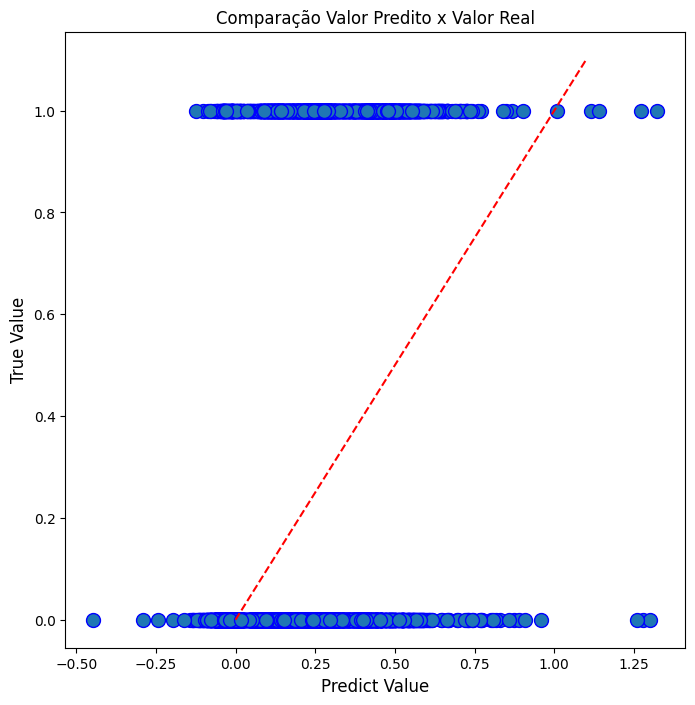

In [187]:
## define tamanho da figura
fig = plt.figure(figsize=(8,8))

# Configurações do plot
l = plt.plot(y_pred, y_test, 'bo') # Define os eixos x e y. O argumento 'bo' indica que queremos que os elementos
                                    # apareçam como circulos azuis
plt.setp(l, markersize=10)          # Aqui definimos o tamanho dos circulos
plt.setp(l, markerfacecolor='C0')   # Aqui definimos a cor do contorno

## Titulo e eixos
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

## Aqui definimos a equação da reta de aproximação e adicionamos ela no plot
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

## Exibição
plt.show()